In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from imblearn.over_sampling import SMOTE  # as it is an imbalanced data
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter #imbalanced dataset
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv('../input/bankloan/bankloan.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.isna().any().value_counts()

True     7
False    6
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df = df.drop('Loan_ID',axis = 1)

In [8]:
df['LoanAmount'] = (df['LoanAmount']*1000).astype(int)

In [9]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141000,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267000,360.0,1.0,Urban,Y


In [10]:
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [11]:
Counter(df['Loan_Status'])['Y']/df['Loan_Status'].size

0.6916666666666667

This is an imbalanced data and we need to balance it

### Importing Data

In [12]:
pre_Y= df['Loan_Status']
pre_X = df.drop('Loan_Status',axis = 1)
X = pd.get_dummies(pre_X)
Y = pre_Y.map(dict(Y = 1, N = 0))

In [13]:
pre_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000,360.0,1.0,Urban
4,Male,No,0.0,Graduate,No,6000,0.0,141000,360.0,1.0,Urban
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267000,360.0,1.0,Urban


In [14]:
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1


# Synthetic Minority Oversampling Technique - SMOTE

In [15]:
smote = SMOTE(sampling_strategy = 'minority')
X1 , y = smote.fit_resample(X,Y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)

In [16]:
Counter(y)

Counter({0: 332, 1: 332})

## Train Test Split

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size= 0.1,shuffle = True, random_state = 42)

### Create the Neural Network

In [18]:
classifier = Sequential()
classifier.add(Dense(200,activation = 'relu',kernel_initializer='random_normal',input_dim =X_test.shape[1]))
classifier.add(Dense(400,activation = 'relu',kernel_initializer='random_normal'))
classifier.add(Dense(4,activation = 'relu',kernel_initializer='random_normal'))
classifier.add(Dense(1,activation = 'sigmoid',kernel_initializer='random_normal'))
classifier.compile(optimizer = 'adam',loss= 'binary_crossentropy',metrics = ['accuracy'])
classifier.fit(X_train,Y_train,batch_size= 20,epochs = 50,verbose = 0)
evaluate_model = classifier.evaluate(X_train,Y_train)
evaluate_model
               
               



2022-08-21 05:31:14.982472: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-08-21 05:31:15.167683: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


19/19 [==============================] - 0s 2ms/step - loss: 0.2885 - accuracy: 0.8827


[0.2884882688522339, 0.8827470541000366]

In [19]:
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred >0.5)

In [20]:
Y_pred

array([[ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

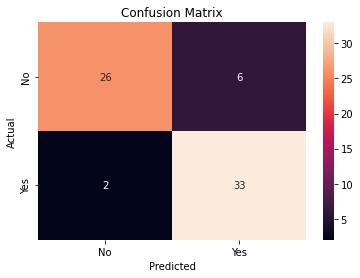

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
axis = plt.subplot()
sns.heatmap(cm,annot = True,ax=axis) #annote = True is to annotate cells
#labels, titles and ticks
axis.set_xlabel('Predicted')
axis.set_ylabel('Actual')
axis.set_title('Confusion Matrix')
axis.xaxis.set_ticklabels(['No','Yes'])
axis.yaxis.set_ticklabels(['No','Yes'])

